In [6]:
#Installing the required library
!pip install ucimlrepo

In [49]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [7]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
chronic_kidney_disease = fetch_ucirepo(id=336)

# data (as pandas dataframes)
X = chronic_kidney_disease.data.features
y = chronic_kidney_disease.data.targets

# metadata
print(chronic_kidney_disease.metadata)

# variable information
print(chronic_kidney_disease.variables)

{'uci_id': 336, 'name': 'Chronic Kidney Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/336/data.csv', 'abstract': 'This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 400, 'num_features': 24, 'feature_types': ['Real'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5G020', 'creators': ['L. Rubini', 'P. Soundarapandian', 'P. Eswaran'], 'intro_paper': None, 'additional_info': {'summary': 'We use the following representation to collect the dataset\r\n                        age\t\t-\tage\t\r\n\t\t\tbp\t\t-\tblood pressure\r\n\t\t\tsg\t

In [9]:
x=(chronic_kidney_disease.data.original)
df1=pd.DataFrame(x)
df1

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


In [10]:
#Recognizing the null symbol
df2=chronic_kidney_disease.metadata.missing_values_symbol
df2

'NaN'

In [11]:
#Defining the symbol for each unit
df3=chronic_kidney_disease.variables.units
df3

,units
0,year
1,mm/Hg
2,None
3,None
4,None
5,None
6,None
7,None
8,None
9,mgs/dl


In [12]:
#Renaming the columns to understand labels
df1.rename(columns={'bp':'BloodPressure',\
                    'sg':'SpecificGravity',\
                    'al':'Albumin',\
                    'su':'Sugar',\
                    'rbc':'redBloodCells',\
                    'pc':'pus cell',\
                    'pcc':'pus cell clumps',\
                    'ba':'bacteria',\
                    'bgr':'blood glucose random',\
                    'bu':'blood urea',\
                    'sc':'serum creatinine',\
                    'sod':'sodium',\
                    'pot':'potassium',\
                    'hemo':'hemoglobin',\
                    'pcv':'packed cell volume',\
                    'wbcc':'white blood cell count',\
                    'rbcc':'red blood cell count',\
                    'htn':'hypertension',\
                    'dm':'diabetes melitus',\
                    'cad':'coronary artery disease',\
                    'appet':'appetite',\
                    'pe':'pedal edema',\
                    'ane':'anemia',\
                    'class':'ckd or not ckd'},\
            inplace=True)
print(df1)

      age  BloodPressure  SpecificGravity  Albumin  Sugar redBloodCells  \
0    48.0           80.0            1.020      1.0    0.0           NaN   
1     7.0           50.0            1.020      4.0    0.0           NaN   
2    62.0           80.0            1.010      2.0    3.0        normal   
3    48.0           70.0            1.005      4.0    0.0        normal   
4    51.0           80.0            1.010      2.0    0.0        normal   
..    ...            ...              ...      ...    ...           ...   
395  55.0           80.0            1.020      0.0    0.0        normal   
396  42.0           70.0            1.025      0.0    0.0        normal   
397  12.0           80.0            1.020      0.0    0.0        normal   
398  17.0           60.0            1.025      0.0    0.0        normal   
399  58.0           80.0            1.025      0.0    0.0        normal   

     pus cell pus cell clumps    bacteria  blood glucose random  ...  \
0      normal      notprese

In [13]:
print(df1['ckd or not ckd'].unique())

['ckd' 'ckd\t' 'notckd']


In [14]:
df1['ckd or not ckd'] = df1['ckd or not ckd'].replace('ckd\t', 'ckd')

In [15]:
#Statistics of the dataset
df1.describe()

,age,BloodPressure,SpecificGravity,Albumin,Sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [16]:
#Datatypes of the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   BloodPressure            388 non-null    float64
 2   SpecificGravity          353 non-null    float64
 3   Albumin                  354 non-null    float64
 4   Sugar                    351 non-null    float64
 5   redBloodCells            248 non-null    object 
 6   pus cell                 335 non-null    object 
 7   pus cell clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood glucose random     356 non-null    float64
 10  blood urea               381 non-null    float64
 11  serum creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

In [17]:
#Counting null values in each column
df1.isnull().sum()

,0
age,9
BloodPressure,12
SpecificGravity,47
Albumin,46
Sugar,49
redBloodCells,152
pus cell,65
pus cell clumps,4
bacteria,4
blood glucose random,44


In [30]:
# handle missing values: replace  object na with the mod and if it is numeric replace with mean

for col in df1.columns:
    if df1[col].dtype == 'object':
        df1[col] = df1[col].fillna(df1[col].mode()[0])
    elif pd.api.types.is_numeric_dtype(df1[col]):
        df1[col] = df1[col].fillna(df1[col].mean())
df1.head()

,age,BloodPressure,SpecificGravity,Albumin,Sugar,redBloodCells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes melitus,coronary artery disease,appetite,pedal edema,anemia,ckd or not ckd
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,...,44.0,7800.0,5.200000,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,...,38.0,6000.0,4.707435,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,31.0,7500.0,4.707435,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,35.0,7300.0,4.600000,no,no,no,good,no,no,ckd


In [19]:
#checking for not_Cleaned_Data
df1.isnull().sum()

,0
age,0
BloodPressure,0
SpecificGravity,0
Albumin,0
Sugar,0
redBloodCells,0
pus cell,0
pus cell clumps,0
bacteria,0
blood glucose random,0


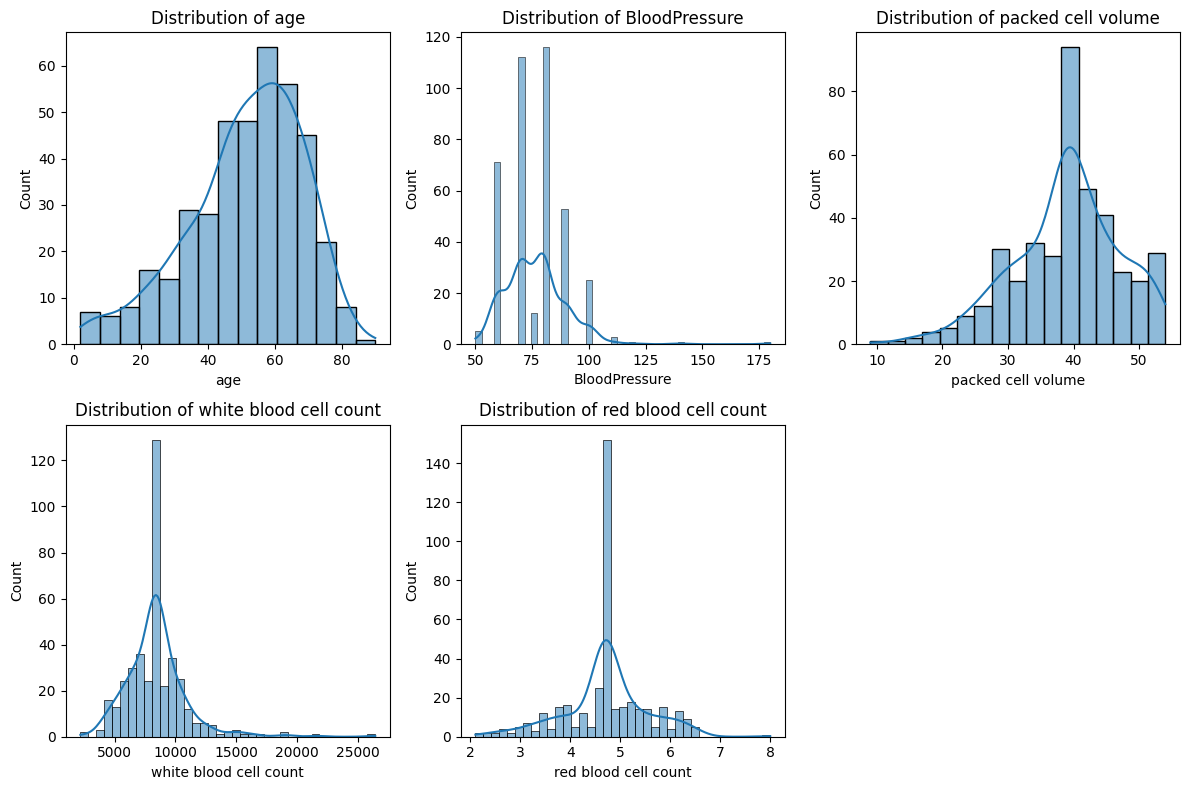

In [20]:
# Count plot for some features
numeric_features = ['age', 'BloodPressure', 'packed cell volume', 'white blood cell count', 'red blood cell count']
plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df1[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

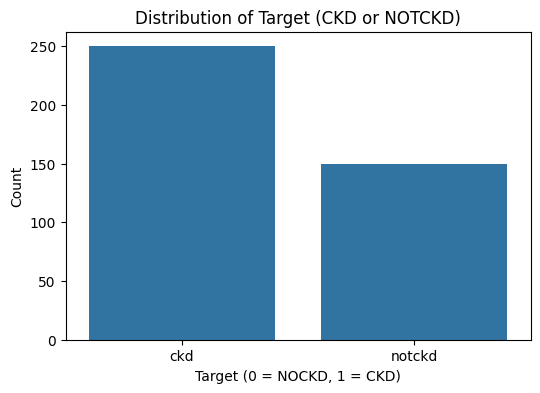

In [21]:
plt.figure(figsize=(6, 4))
sns.countplot(x='ckd or not ckd', data=df1)
plt.title('Distribution of Target (CKD or NOTCKD)')
plt.xlabel('Target (0 = NOCKD, 1 = CKD)')
plt.ylabel('Count')
plt.show()

In [22]:
#Encoding Categorial Features
ohe=OneHotEncoder(handle_unknown='ignore',sparse_output=False).set_output(transform='pandas')

In [26]:
print(df1['diabetes melitus'].unique())

['yes' 'no' '\tno']


In [27]:
df1['diabetes melitus'] = df1['diabetes melitus'].replace('\tno', 'no')
df1

,age,BloodPressure,SpecificGravity,Albumin,Sugar,redBloodCells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes melitus,coronary artery disease,appetite,pedal edema,anemia,ckd or not ckd
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,...,44.0,7800.0,5.200000,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,...,38.0,6000.0,4.707435,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,31.0,7500.0,4.707435,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,35.0,7300.0,4.600000,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.000000,...,47.0,6700.0,4.900000,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.000000,...,54.0,7800.0,6.200000,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.000000,...,49.0,6600.0,5.400000,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.000000,...,51.0,7200.0,5.900000,no,no,no,good,no,no,notckd


In [28]:
ohetransform=ohe.fit_transform(df1[['diabetes melitus','anemia']])
ohetransform

,diabetes melitus_no,diabetes melitus_yes,anemia_no,anemia_yes
0,0.0,1.0,1.0,0.0
1,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0
3,1.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0
...,...,...,...,...
395,1.0,0.0,1.0,0.0
396,1.0,0.0,1.0,0.0
397,1.0,0.0,1.0,0.0
398,1.0,0.0,1.0,0.0


In [34]:
encoded_df1=pd.concat([df1,ohetransform],axis=1).drop(columns=['diabetes melitus','anemia'])
print(encoded_df1)

      age  BloodPressure  SpecificGravity  Albumin  Sugar redBloodCells  \
0    48.0           80.0            1.020      1.0    0.0        normal   
1     7.0           50.0            1.020      4.0    0.0        normal   
2    62.0           80.0            1.010      2.0    3.0        normal   
3    48.0           70.0            1.005      4.0    0.0        normal   
4    51.0           80.0            1.010      2.0    0.0        normal   
..    ...            ...              ...      ...    ...           ...   
395  55.0           80.0            1.020      0.0    0.0        normal   
396  42.0           70.0            1.025      0.0    0.0        normal   
397  12.0           80.0            1.020      0.0    0.0        normal   
398  17.0           60.0            1.025      0.0    0.0        normal   
399  58.0           80.0            1.025      0.0    0.0        normal   

     pus cell pus cell clumps    bacteria  blood glucose random  ...  \
0      normal      notprese

In [37]:
#Selecting some features
selected_columns = encoded_df1[['age',
                        'BloodPressure',
                        'Albumin',
                        'anemia_no',
                        'anemia_yes',
                        'diabetes melitus_no',
                        'diabetes melitus_yes',
                        'white blood cell count',
                        'red blood cell count']]
print(selected_columns)


      age  BloodPressure  Albumin  anemia_no  anemia_yes  diabetes melitus_no  \
0    48.0           80.0      1.0        1.0         0.0                  0.0   
1     7.0           50.0      4.0        1.0         0.0                  1.0   
2    62.0           80.0      2.0        0.0         1.0                  0.0   
3    48.0           70.0      4.0        0.0         1.0                  1.0   
4    51.0           80.0      2.0        1.0         0.0                  1.0   
..    ...            ...      ...        ...         ...                  ...   
395  55.0           80.0      0.0        1.0         0.0                  1.0   
396  42.0           70.0      0.0        1.0         0.0                  1.0   
397  12.0           80.0      0.0        1.0         0.0                  1.0   
398  17.0           60.0      0.0        1.0         0.0                  1.0   
399  58.0           80.0      0.0        1.0         0.0                  1.0   

     diabetes melitus_yes  

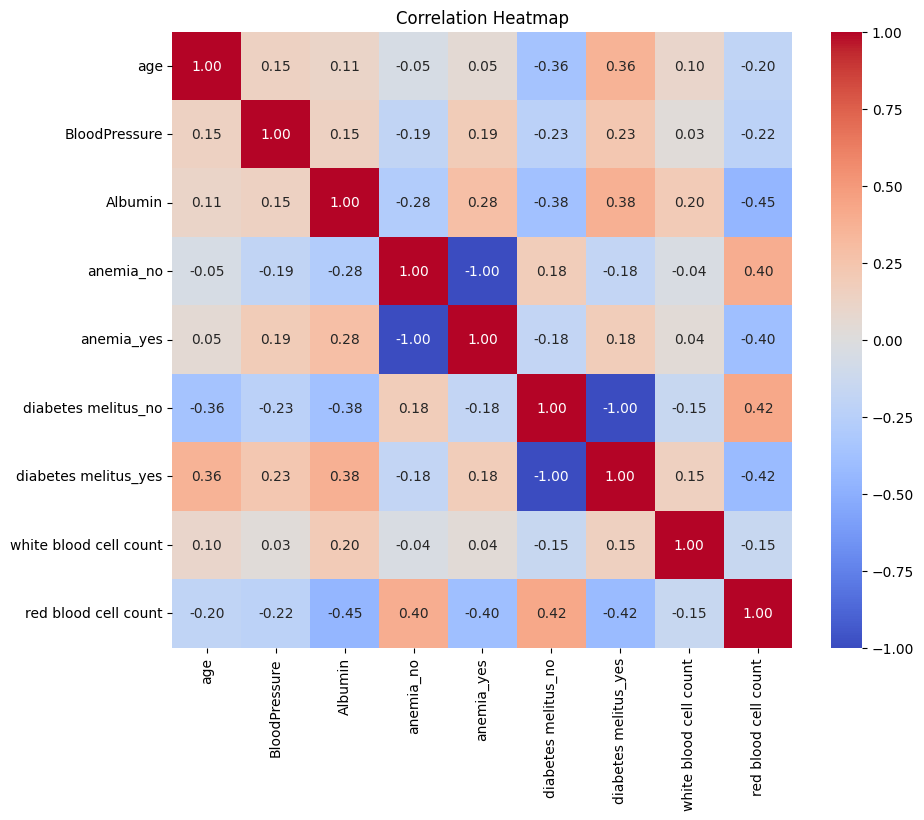

In [38]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(selected_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

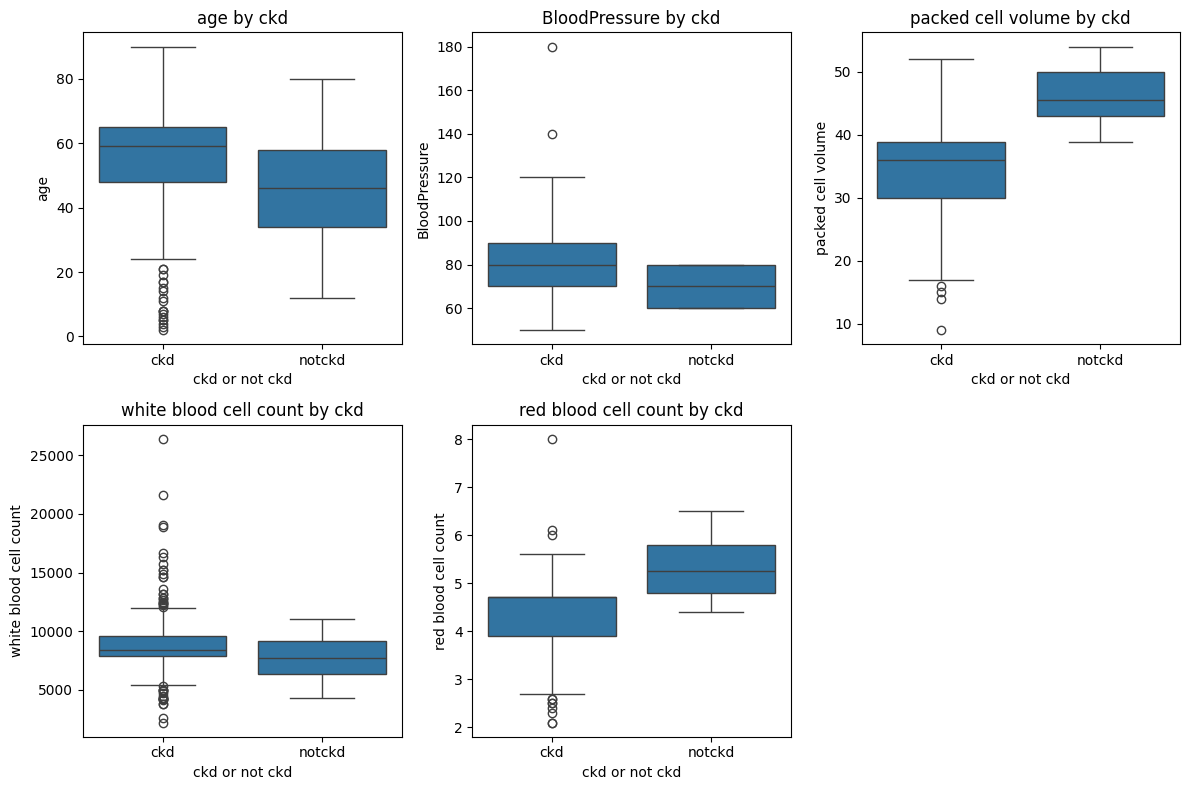

In [41]:
# Box plots to check for outliers
plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='ckd or not ckd', y=column, data=df1)
    plt.title(f'{column} by ckd')
plt.tight_layout()
plt.show()

In [42]:
# --- 2. Preprocessing ---


X = selected_columns
y = df1['ckd or not ckd']

In [46]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [47]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Training set shape: (320, 9)
Testing set shape: (80, 9)



Confusion Matrix:
[[50  2]
 [ 2 26]]

Classification Report:
              precision    recall  f1-score   support

         ckd       0.96      0.96      0.96        52
      notckd       0.93      0.93      0.93        28

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80



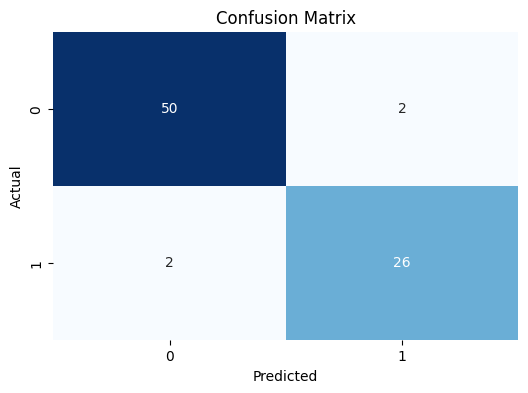

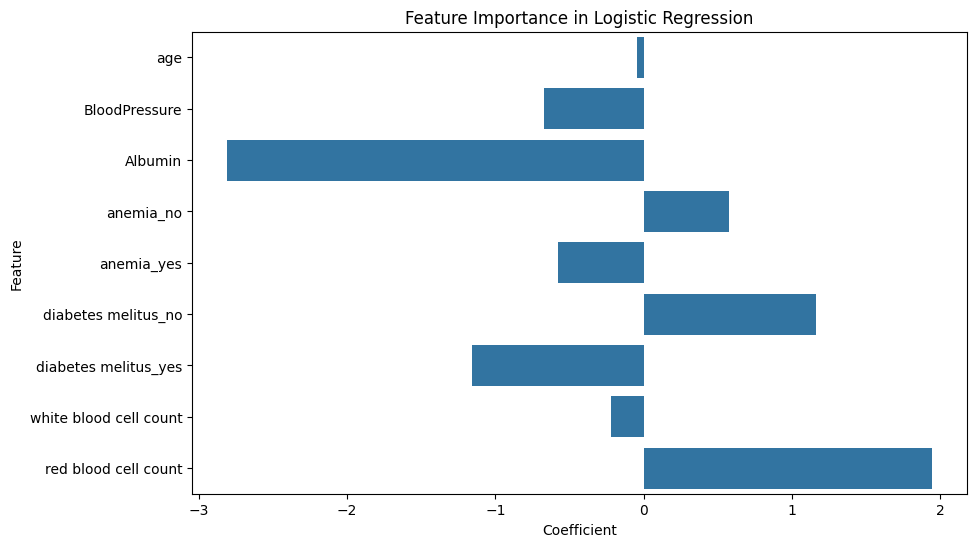

In [53]:
# --- 3. Logistic Regression ---

#  train model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Predict on test set
y_pred = log_reg.predict(X_test)

# --- 4. Evaluation ---

# Confusion Matrix
# Convert y_test to numerical values for evaluation
y_test_numeric = y_test.map({'ckd': 1, 'notckd': 0})
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC Curve and AUC
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test_numeric, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# --- Feature Importance ---
# Get feature coefficients and create a DataFrame
coef_df1 = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': log_reg.coef_[0]})

# Visualize Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df1)
plt.title('Feature Importance in Logistic Regression')
plt.show()